In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [29]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 

In [30]:
data=pd.read_csv("Churn_Modelling.xls")

In [31]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
data.shape

(10000, 14)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [34]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [35]:
for col in data.columns:
    if data[col].dtypes=='object':
        num_of_unique_cat=len(data[col].unique())
        print("feature '{col_name}'has'{unique_cat}'unique categories".format(col_name=col,unique_cat=num_of_unique_cat))

feature 'Surname'has'2932'unique categories
feature 'Geography'has'3'unique categories
feature 'Gender'has'2'unique categories


In [36]:
data=data.drop("Surname",axis=1)

In [37]:
visualization_1=data.pivot_table("Exited" ,index="Gender",columns="Geography")

In [38]:
visualization_1

Geography,France,Germany,Spain
Gender,,,
Female,0.203450,0.375524,0.212121
Male,0.127134,0.278116,0.131124


In [39]:
data=data.drop(["Geography","Gender"],axis=1)

In [40]:
data=data.drop(["RowNumber","CustomerId"],axis=1)

In [41]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
5,645,44,8,113755.78,2,1,0,149756.71,1
6,822,50,7,0.00,2,1,1,10062.80,0
7,376,29,4,115046.74,4,1,0,119346.88,1
8,501,44,4,142051.07,2,0,1,74940.50,0
9,684,27,2,134603.88,1,1,1,71725.73,0


In [42]:
correlation=data.corr()

In [43]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
5,645,44,8,113755.78,2,1,0,149756.71,1
6,822,50,7,0.00,2,1,1,10062.80,0
7,376,29,4,115046.74,4,1,0,119346.88,1
8,501,44,4,142051.07,2,0,1,74940.50,0
9,684,27,2,134603.88,1,1,1,71725.73,0


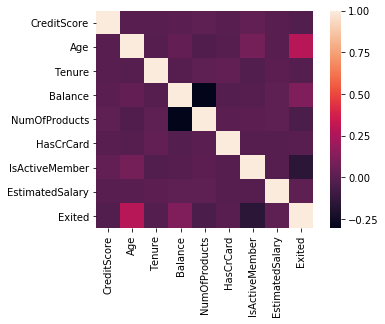

In [44]:
sns.heatmap(correlation.T,square=True,annot=False,fmt="d",cbar=True)

In [45]:
data=data.reindex(np.random.permutation(data.index))

In [46]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6075,504,42,3,134936.97,2,0,0,135178.91,0
2892,601,44,3,0.00,2,1,0,30607.11,0
6061,544,47,5,105245.21,1,0,0,99922.08,1
7948,705,25,3,113736.27,1,0,1,196864.61,0
286,602,29,5,103907.28,1,1,0,161229.84,0
9701,678,38,3,124483.53,1,1,0,126253.31,0
6344,850,41,3,0.00,2,1,0,128892.36,0
8983,723,37,3,94661.53,2,1,0,121239.65,0
8922,550,35,9,129847.75,2,1,0,197325.40,0
8705,742,35,2,79126.17,1,1,1,126997.53,0


In [47]:
clo=data.drop("Exited",axis=1)

In [48]:
target=data["Exited"]

In [49]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(clo,target,test_size=0.2)

In [50]:
xtrain.shape

(8000, 8)

In [51]:
model=LogisticRegression()

In [52]:
model.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
pred=model.predict(xtest)

In [54]:
accuracy_score(ytest,pred)

0.7865